## Seleccion de variables para el Metodo ##

Basandonos en el el objetivo de nuestro modelo donde es predecir la diferencia de goles (goal_diff) y el analisis de la ventaja por localia. 

Para ello seleccionamos las variables relevantes desde la base de datos original.

#### Variables candidatas
| Variable | Tipo | Descripción | Justificación |
| :--- | :--- | :--- | :--- |
| **home_team** | Categórica | Equipo local | Determina rendimiento histórico (factor clave de desempeño). | 
| **away_team** | Categórica | Equipo visitante | Igual de importante que el equipo local (factor clave de desempeño). | 
| **home_score** | Numérica | Goles del local | Es una variable objetivo o está directamente relacionada con ella. |
| **away_score** | Numérica | Goles del visitante | Es una variable objetivo o está directamente relacionada con ella. |
| **tournament** | Categórica | Torneo del partido | Los torneos tienen distinta dificultad o prestigio. |
| **city** | Categórica | Ciudad | Muy variable, con miles de categorías (alta cardinalidad). |
| **country** | Categórica | País donde se juega | Relacionado con la localía y puede ser un factor importante. |
| **neutral** | Binaria | Si el partido fue en campo neutral | Afecta el factor de localía. |
| **date** | Fecha | Fecha del partido | Se usará para crear variables temporales y variables históricas/agregadas. |

In [ ]:
#Creacion de la variable año del partido
df["year"] = df["date"].dt.year
#Los equipos cambian con el tiempo; incluir la fecha mejora el modelo.

In [66]:
#diferencia de goles (variable objetivo)
df["goal_diff"] = df["home_score"] - df["away_score"]


In [67]:
#Variable victoria local
df["home_win"] = (df["home_score"] > df["away_score"]).astype(int)


In [ ]:
#Promedio de goles del local anotados en los ultimos 5 partidos
df["home_last5_goals"] = (
    df.groupby("home_team")["home_score"]
      .rolling(5, min_periods=1).mean()
      .reset_index(level=0, drop=True)
)


In [69]:
#Promedio de goles del visitante anotados en los ultimos 5 partidos
df["away_last5_goals"] = (
    df.groupby("away_team")["away_score"]
      .rolling(5, min_periods=1).mean()
      .reset_index(level=0, drop=True)
)

In [70]:
#Promedio de diferencia de goles recientes Del local
df["home_last5_diff"] = (
    df.groupby("home_team")["goal_diff"]
      .rolling(5, min_periods=1).mean()
      .reset_index(level=0, drop=True)
)


In [ ]:
#Promedio de diferencia de goles recientes Del visitante
df["away_last5_diff"] = (
    df.groupby("away_team")["goal_diff"]
      .rolling(5, min_periods=1).mean()
      .reset_index(level=0, drop=True)
)
#Los equipos no mantienen rendimiento constante por ello las variables históricas capturan forma reciente del equipo.

In [80]:
# Codificacion de variables categoricas.
if 'df' not in globals():
	print("Variable 'df' no definida. Ejecuta las celdas anteriores que cargan/definen 'df' antes de esta celda.")
else:
	df["home_team_encoded"] = pd.factorize(df["home_team"])[0]
	df["away_team_encoded"] = pd.factorize(df["away_team"])[0]
	df["tournament_encoded"] = pd.factorize(df["tournament"])[0]


### Histograma Variable Objetivo

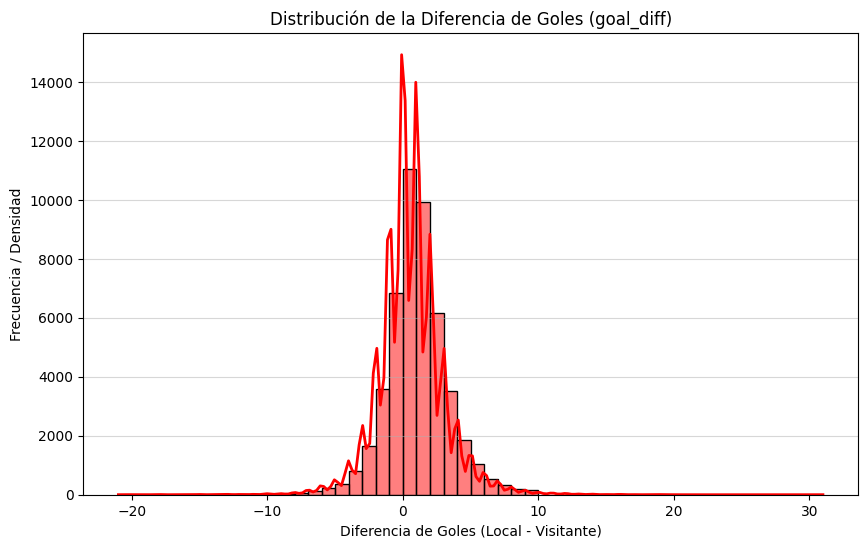

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df['goal_diff'],
    kde=True,
    bins=range(-10, 11),
    color='red', # Color de las barras
    line_kws={'color': 'darkgreen', 'linewidth': 2}
)
plt.title('Distribución de la Diferencia de Goles (goal_diff)')
plt.xlabel('Diferencia de Goles (Local - Visitante)')
plt.ylabel('Frecuencia / Densidad')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Impacto de Localia

C:\Users\CAMILO\AppData\Local\Temp\ipykernel_19140\2800625913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.index, y=win_rate.values, palette=['forestgreen', 'darkorange'])


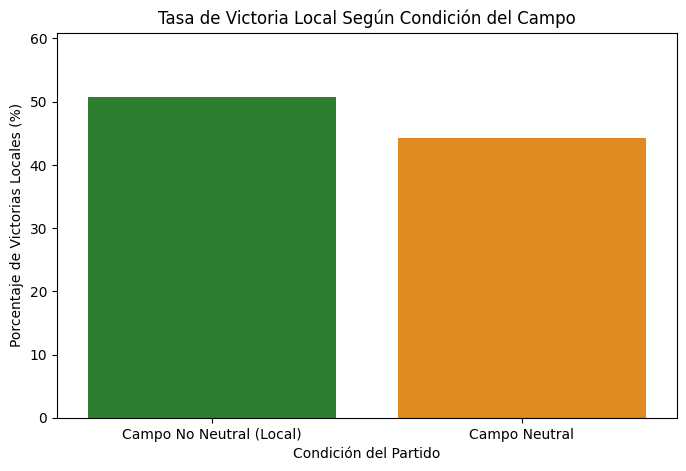

In [98]:
win_rate = df.groupby('neutral')['home_win'].mean() * 100
win_rate.index = ['Campo No Neutral (Local)', 'Campo Neutral']

plt.figure(figsize=(8, 5))
sns.barplot(x=win_rate.index, y=win_rate.values, palette=['forestgreen', 'darkorange'])
plt.title('Tasa de Victoria Local Según Condición del Campo')
plt.xlabel('Condición del Partido')
plt.ylabel('Porcentaje de Victorias Locales (%)')
plt.ylim(0, win_rate.max() * 1.2)
plt.show()

### Distribución de Partidos a lo largo del Tiempo (por año)

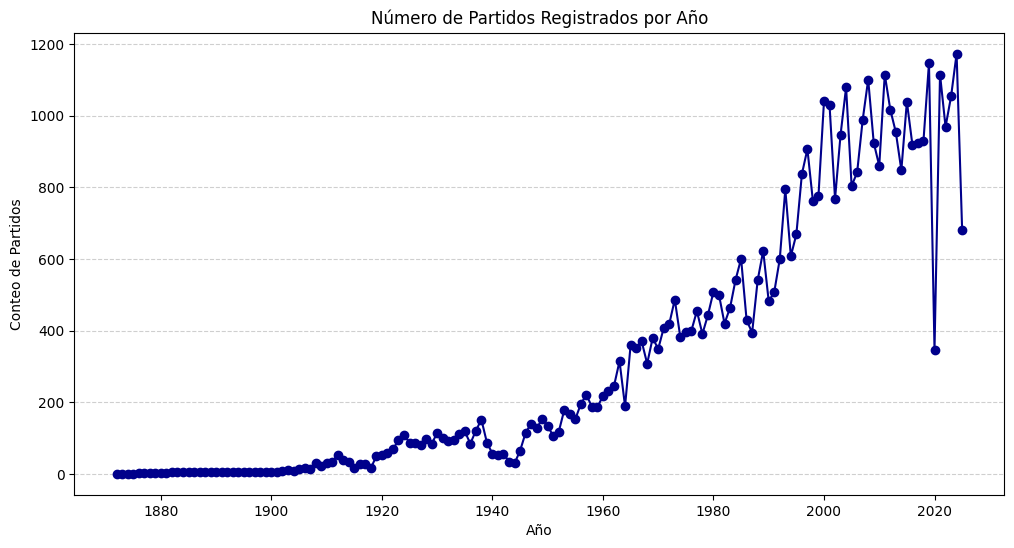

In [99]:
plt.figure(figsize=(12, 6))
# Contar el número de partidos por año
partidos_por_año = df['year'].value_counts().sort_index()

partidos_por_año.plot(kind='line', marker='o', color='darkblue')
plt.title('Número de Partidos Registrados por Año')
plt.xlabel('Año')
plt.ylabel('Conteo de Partidos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Variables de Rendimiento Reciente

C:\Users\CAMILO\AppData\Local\Temp\ipykernel_19140\3171183509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Equipo', y='Diferencia de Goles Promedio', data=data_to_plot, palette=['firebrick', 'royalblue'])


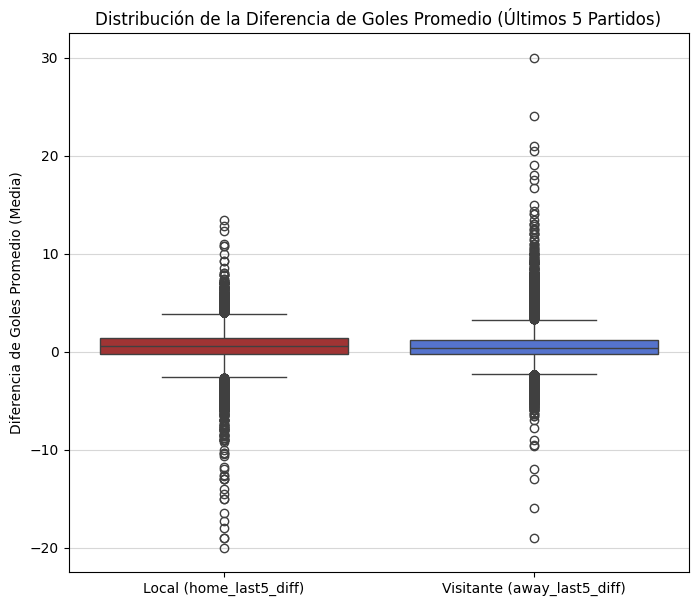

In [100]:
data_to_plot = df[['home_last5_diff', 'away_last5_diff']].melt(var_name='Equipo', value_name='Diferencia de Goles Promedio')

plt.figure(figsize=(8, 7))
sns.boxplot(x='Equipo', y='Diferencia de Goles Promedio', data=data_to_plot, palette=['firebrick', 'royalblue'])
plt.title('Distribución de la Diferencia de Goles Promedio (Últimos 5 Partidos)')
plt.xlabel('')
plt.ylabel('Diferencia de Goles Promedio (Media)')
plt.xticks(ticks=[0, 1], labels=['Local (home_last5_diff)', 'Visitante (away_last5_diff)'])
plt.grid(axis='y', alpha=0.5)
plt.show()

## Variables seleccinadas Para el modelo 
|Predictoras (X)|
|:---|
|year|
|neutral|
|home_team_encoded|
|away_team_encoded|
|tournament_encoded|
|home_last5_goals|
|away_last5_goals|
|home_last5_diff|
|away_last5_diff|
---
|Variable Objetivo (y)|
|:---|
|goal_diff|


### Conclusiones 
En esta parte de preparación pudimos sentarnos a pensar con calma qué variables realmente necesitábamos para el modelo y cómo íbamos a trabajar con ellas. Revisar si alguna podía discretizarse o si debíamos dejarla tal cual nos ayudó a entender mejor el comportamiento del sistema y a organizar lo que viene.
Más que un paso técnico, fue una forma de aclarar ideas, de ver qué es importante y qué no, y de dejar el proyecto listo para avanzar sin enredos. Con esto, ya tenemos una base clara y ordenada para continuar el trabajo de una manera más segura y coherente.